# 第5回課題

## 課題1
例題の平方根と同様の手順でシグモイド関数の近似解を再帰で求めた。区間[a,b]の中点mを取り、シグモイド関数が単調増加しているため、(sigmoid(m))　> yなら区間[a,m]で再び評価し、(sigmoid(m)) < yなら区間[m,b]で再び評価する。こうして評価する区間が段々と狭まり、差がEpsilonmとなった時のmを返す。

In [2]:
import math
Epsilon = 0.0001

def sigmoid(x):
    return 1 / ( 1 + math.exp(-x))

def sigmoid_inverse(y,a,b):
    m = (a + b) /2
    if abs(sigmoid(m) - y) < Epsilon:
        return m
    elif abs(sigmoid(m)) > y:
        return sigmoid_inverse(y,a,m)
    else:
        return sigmoid_inverse(y,m,b)

## 課題2
区間[l,r]の中点mを取り、aの要素が昇順であるため、a[m] > xなら区間[l,m]で、a[m] < xなら区間[m,r]で評価する。
そうして区間が狭まり、l + 1 = rとなった時にa[l]とxを比べ、一致しているならlを返し、一致しないのならaにxと同じ要素はなかったということなので-1を返す。

In [3]:
def binary_search(a, x, l, r):
    m = (l +r) //2
    if (l +1 == r) and (a[l] == x):
        return l
    elif (l +1 == r) and (a[l] != x):
        return -1
    elif (l+1 < r) and (a[m] > x):
        return binary_search(a, x, l,m)
    else:
        return binary_search(a, x, m,r)

## 課題3
各座標の差　dx = x1 - x0、dy = y1 - y0を用意し、一度コッホ曲線の作業が行われた際に追加される３つの頂点の座標を、dx dy を使って計算した。
(x0,y0)に近い方から(xa,ya), (xb,yb), (xc,yc)　である。(xa,ya), (xc,yc)は(x0,y0) と(x1, y1)を結んだ線分Lを３等分した点であるため容易に計算できる。
(xb, yb)は線分Lの中点からLと直交する方向、(-dy, dx)にr = √3 / 6 分移動した点である。
それらの頂点を返してnを1減らす。これをn = 0まで繰り返せば良い。プロットを見てもコッホ曲線が描けている。n = 2の場合の頂点の座標を
http://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ALDS1_5_C&lang=jp　にあった座標と比較しても、計算誤差の範囲で一致しており、正しく実装できていると考えられる。

[[0, 0], [11.111111111111112, 0.0], [16.666666666666668, 9.622504486493764], [22.222222222222225, 0.0], [33.333333333333336, 0.0], [38.88888888888889, 9.622504486493762], [33.33333333333334, 19.245008972987524], [44.44444444444444, 19.245008972987524], [50.0, 28.867513459481287], [55.55555555555556, 19.245008972987527], [66.66666666666667, 19.245008972987527], [61.111111111111114, 9.622504486493764], [66.66666666666667, 0.0], [77.77777777777779, 0.0], [83.33333333333334, 9.62250448649376], [88.88888888888889, 0.0]]


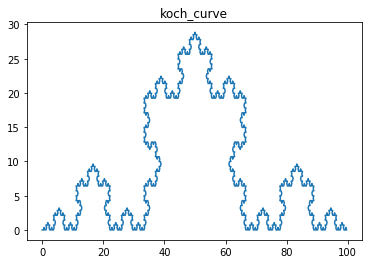

In [11]:
def koch(x0,y0,x1,y1,n):
    import math
    if n==0:
        return [[x0,y0]]
    else:
        dx = x1 - x0
        dy = y1 - y0
        r = math.sqrt(3) / 6
        xa = x0 + dx / 3
        ya = y0 + dy /3
        xb = (x0 + dx / 2) - (dy * r)
        yb = (y0 + dy / 2) + (dx * r) 
        xc = x0 + (2 * dx) / 3
        yc = y0 + (2 * dy) /3
        
        return koch(x0,y0,xa,ya, n-1 ) + koch(xa, ya,  xb , yb, n-1) + koch( xb, yb,xc,yc, n-1) + koch(xc,yc,x1,y1 ,n -1) 
        
%matplotlib inline
def plot_koch(a):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    a_ = np.array(a)
    xlist = a_[:, 0]
    ylist = a_[:, 1]
    
    ax.plot(xlist, ylist)
    ax.set_title('koch_curve')

print(koch(0,0,100,0,2))
a = koch(0,0,100,0,5)
plot_koch(a)

## 課題4
first_halfとsecond_halfは、aの要素数で場合分けして記述した。奇数の場合後半の要素が１多いものとすれば、first_halfは、b = [:len(a) // 2]　second_halfははb = [len(a) // 2 :]とすれば良いのでかなり簡潔になる。mergesortでは、 first = mergesort(first_half(a))、second = mergesort(second_half(a))
でaの要素数が1になるまで分割を行い、return merge(first, second)でそれらを併合している。

In [5]:
def merge(a, b):
    c=[]
    i,j = 0,0
    while i<len(a) and j<len(b):
        if a[i] < b[j]: 
            c.append(a[i])
            i+=1 
        else:
            c.append(b[j])
            j+=1
    # ループ不変条件: a[0:i]とb[0:j]は昇順にcに詰まっている a[i:] # a[i] 以降の a の要素を全て c に詰める
    c += a[i:]
    c += b[j:] 
    return c

def first_half(a):
    b = []
    l = len(a)
    p = l // 2
    if l % 2 == 0:
        for i in range(p):
            b.append(a[i])
    else:
        for i in range(p + 1):
            b.append(a[i])
    return b

def second_half(a):
    b = []
    l = len(a)
    p = l // 2
    if l % 2 == 0:
        for i in range(p,l):
            b.append(a[i])
    else:
        for i in range(p + 1,l):
            b.append(a[i])
    return b

def mergesort(a):
    if len(a) <= 1:
        return a
    
    first = mergesort(first_half(a))
    second = mergesort(second_half(a))

    return merge(first, second)

## テストコード

In [6]:
import unittest

class TestKadai(unittest.TestCase):
    
    def test_kadai1(self):
        self.assertEqual( -1.38671875, sigmoid_inverse(0.2, -10, 10))
        
    def test_kadai2(self):
        a=[1,3,5,7]
        self.assertEqual(1, binary_search(a, 3, 0, len(a)))
    
#     def test_kadai3(self):
#         a = [[0, 0], [11.11111111, 0.0], [16.666666666666668, 9.622504486493762], [22.222222222222225, 0.0], [33.333333333333336, 0.0], [38.88888888888889, 9.622504486493762], [33.33333333333334, 19.245008972987524], [44.44444444444444, 19.245008972987524], [50.0, 28.867513459481287], [55.55555555555556, 19.245008972987527], [66.66666666666667, 19.245008972987527], [61.111111111111114, 9.622504486493764], [66.66666666666667, 0.0], [77.77777777777779, 0.0], [83.33333333333334, 9.622504486493762], [88.88888888888889, 0.0]]
#         self.assertEqual([1, 2, 3, 4, 6, 12], factor(12))
    
    def test_kadai4(self):
        self.assertEqual([1, 2,3,4,5,6,7,8,9], mergesort([8,3,4,1,5,9,6,7,2]))
    
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK
